<a href="https://colab.research.google.com/github/MarcoRuizS/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/MarcoRuiz_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 1 </br>
Algoritmo de Optimizacion</br>
Marco X. Ruiz S.</br>
https://colab.research.google.com/drive/1dyPzcLQblgzIyKAdp8bXSzMOf42mJQ0Q

### Codigo Torres

In [2]:
def torres(N,desde,hasta): #N: numero de fichas, torres
    if N==1: #si la torre igual a 1 
        print('lleva la ficha desde', desde, 'hasta',hasta)
    else:
        torres(N-1, desde, 6-desde-hasta)
        print('lleva la ficha desde', desde, 'hasta',hasta)
        torres(N-1, 6-desde-hasta, hasta)

torres(4,1,3)

lleva la ficha desde 1 hasta 2
lleva la ficha desde 1 hasta 3
lleva la ficha desde 2 hasta 3
lleva la ficha desde 1 hasta 2
lleva la ficha desde 3 hasta 1
lleva la ficha desde 3 hasta 2
lleva la ficha desde 1 hasta 2
lleva la ficha desde 1 hasta 3
lleva la ficha desde 2 hasta 3
lleva la ficha desde 2 hasta 1
lleva la ficha desde 3 hasta 1
lleva la ficha desde 2 hasta 3
lleva la ficha desde 1 hasta 2
lleva la ficha desde 1 hasta 3
lleva la ficha desde 2 hasta 3


#### Codigo Damas

In [0]:
def reinas (N, solucion, etapa): #Tamano del tablero
    for i in range(1,N+1):
        solucion[etapa]=i
        
        if es_prometedora(solucion,etapa):
            if etapa == N-1 :
                print('\n\n solucion es:')
                print(solucion)
            else:
                reinas(N,solucion,etapa+1)
        else:
            None
        solucion[etapa]=0

def es_prometedora(SOLUCION, etapa):
  #Si la solucion tiene dos soluciones iguales no es valida  Dos reinas en la misma 
    for i in range(etapa+1):
    #print('el valor' + str(SOLUCION[i])+'esta'+ str(SOLUCION[I])) + 'VECES')
        if SOLUCION.count(SOLUCION[i])>1:
              return False
    #Verifica las Diagonales
        for j in range(i+1, etapa+1):
          #pront('comprobando la diagonal'+str(i)+"y"+str(j))
            if abs(i-j)==abs(SOLUCION[i]-SOLUCION[j]): return False
    return True


In [4]:
import numpy as np

N = 4
solucion =  [0] * N
etapa = 0
reinas (N, solucion, etapa)



 solucion es:
[2, 4, 1, 3]


 solucion es:
[3, 1, 4, 2]


#### Puntos Cercanos Fuerza Bruta

In [0]:
#Distancia entre dos puntos 3D por fuerza bruta Euclidea
from scipy.spatial import distance
def distancia_fuerza_bruta(L):
    mejor_distancia = 10000
    R=L
#     L=list(set(L))
    a =0
#     print('L=',L)
    for i in range(len(L)):
        for j in range(i+1, len(L)):
            D=distance.euclidean(R[i],L[j])
#             print(D)
            if D < mejor_distancia and D!=0:
                a=distance.euclidean(R[i],L[j])
                mejor_distancia = D
                x=i
                y=j
    return[a,x,y]


In [0]:
# Funcion Gracica de puntos Aleatorios
def graf(Matriz,Punto1,Punto2):
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.mplot3d import axes3d

    #Grafica Datos 1 D
    if len(Matriz[0]) == 1:
        a=np.zeros(len(Matriz))
        fig, ax=plt.subplots(figsize=(14,7))
        plt.plot(Matriz, a, 'r.', Matriz[Punto1],0, 'gd', Matriz[Punto2],0, 'bd')
        
    #Grafica Datos 2D  
    if len(Matriz[0]) == 2:
        scale = 25.0 
        fig, ax=plt.subplots(figsize=(14,7))
        x_data = Matriz[:,0]
        y_data = Matriz[:,1]
        ax.scatter(x_data, y_data, alpha=0.8, c='red', s=scale, edgecolors='none')
        ax.scatter(Matriz[Punto1][0], Matriz[Punto1][1], alpha=0.8, c='green', s=scale, edgecolors='none')
        ax.scatter(Matriz[Punto2][0], Matriz[Punto2][1], alpha=0.8, c='blue', s=scale, edgecolors='none')
        ax.legend()
        plt.show()
        
    if len(Matriz[0]) == 3:
        from mpl_toolkits.mplot3d import axes3d
        # Creamos la figura
        fig = plt.figure()
        # Creamos el plano 3D
        fig, ax1=plt.subplots(figsize=(10,7))
        ax1 = fig.add_subplot(111, projection='3d')

        # Definimos los datos de prueba
        x = Matriz[:,0]
        y = Matriz[:,1]
        z = Matriz[:,2]

        # Agregamos los puntos en el plano 3D
        ax1.scatter(Matriz[Punto1][0], Matriz[Punto1][1], Matriz[Punto1][2] , c='r', marker='o')
        ax1.scatter(Matriz[Punto2][0], Matriz[Punto2][1], Matriz[Punto2][2], c='g', marker='o')
        ax1.scatter(x, y, z, marker='o')


        # Mostramos el gráfico
        plt.show()
    

Tiempo de Procesamiento:  0.054088592529296875
La distancia al punto más cercano es 43.87904756138688 desde el punto 31 al punto 55 de la lista
punto 31 : [367.13008463  25.26797538 415.52796251]
punto 55 : [372.64251582  68.78430106 414.38196228]


<Figure size 432x288 with 0 Axes>

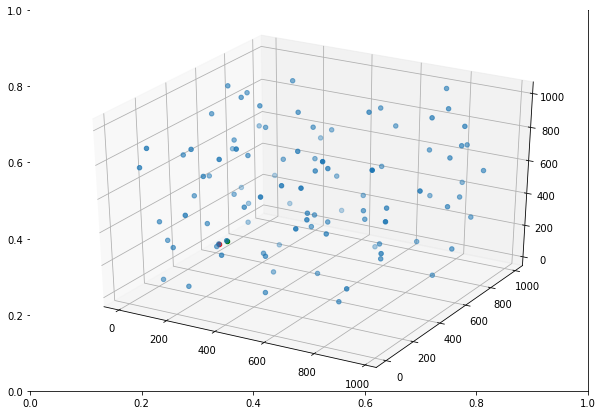

In [10]:
import random
import numpy
import time
from mpl_toolkits.mplot3d import axes3d

#generador de número de datos y dimensión (1,2 o 3)
aleatorios = numpy.random.random((100,3)) *1000
# print(aleatorios)
# print('------------------------')


start = time.time()
a=distancia_fuerza_bruta(aleatorios)
#Calculo del tiempo de ejecucion
end = time.time()

# Representgacion de los datos
print ('Tiempo de Procesamiento: ',end-start)
print('La distancia al punto más cercano es',a[0], 'desde el punto',a[1],'al punto',a[2], 'de la lista')
print('punto',a[1],':',aleatorios[a[1]])
print('punto',a[2],':',aleatorios[a[2]])

graf(aleatorios,a[1],a[2])

#### Puntos Cercanos Divide Y Vencerás

In [0]:
import math

# funcion para ordenar la martriz por valor y posicion
def orden(s):
    return [u for (u, i) in sorted(enumerate(s), key = lambda p: p[1])]
       
#Busca los puntos cercanos de una matriz    
def puntoscercano(s):
    orden(s)
    s_x = orden(s)
    def dist(i,j):
        return abs(s[i]-s[j])
    
    def buscar(i, j):
        if i >= j: #valido matriz
            return None
        elif i + 1 == j: #comparo si esta en el primeros valores
            return (s_x[i], s_x[j])
        else:
            k = (i + j) // 2
            iz = buscar(i, k)
            dr = buscar(k, j)
            (i_iz, j_iz) = iz
            (i_dr, j_dr) = dr

            if iz is None:
                (i_min, j_min) = dr
            elif dr is None:
                (i_min, j_min) = iz
            else:
                d_iz = dist(i_iz,j_iz)
                d_dr = dist(i_dr,j_dr)
                if d_iz < d_dr:
                    (i_min, j_min) = iz
                else:
                    (i_min, j_min) = dr
            return (i_min, j_min)
    return buscar(0, len(s) - 1)

In [12]:
import random
import numpy
import time
from mpl_toolkits.mplot3d import axes3d

#generador de número de datos y dimensión (1,2 o 3)
aleatorios = numpy.random.random((100)) *1000

start = time.time()

# print(aleatorios)
a=puntoscercano(aleatorios)
# print(puntoscercano(aleatorios))

#Calculo del tiempo de ejecucion
end = time.time()

# Representgacion de los datos
print ('Tiempo de Procesamiento: ',end-start)
print('La distancia al punto más cercano es entre',a[0], 'hasta',a[1], 'de la lista')
print('punto',a[0],':',aleatorios[a[0]])
print('punto',a[1],':',aleatorios[a[1]])

Tiempo de Procesamiento:  0.0003387928009033203
La distancia al punto más cercano es entre 83 hasta 20 de la lista
punto 83 : 845.3795740013026
punto 20 : 845.6269753129342
